In [2]:
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#동일한 실험결과를 위해
np.random.seed(42)

In [3]:
#선형 회귀

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

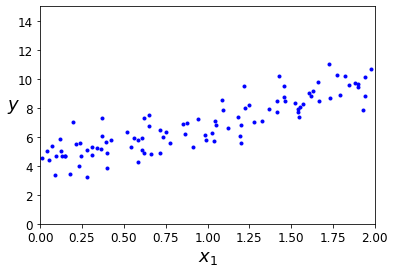

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
#정규 방정식

X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #정규 방정식을 통해 theta 찾기

In [6]:
theta_best

#y = 4 + 3x + (가우시안 잡음)을 기대햇찌만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못했음

array([[4.21509616],
       [2.77011339]])

In [7]:
#theta_best를 이용해 예측하기

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

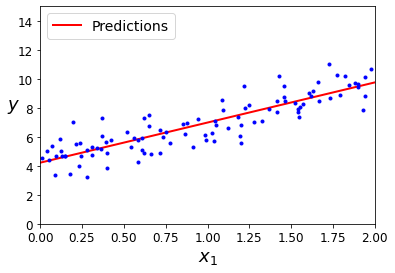

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
#사이킷런에서 선형 회귀 수행하기

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
#LinearRegression 클래스는 scipy.linalg.lstspq() 함수를 사용하므로 이 함수를 직접 사용할 수 있음

# scipy에서 제공하는 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [12]:
#이 함수는 (X의 유사역행렬) * y를 계산한다
#유사역행렬은 특잇값 분해(SVD)를 통해 계산됨 -> 정규방정식을 계산하는 것보다 훨씬 효율적임
#어떤 행렬의 역행렬이 없다면 정규방정식이 작동할 수 없지만 유사역행렬은 항상 구할 수 있음
#np.linalg.pinv()를 사용

np.linalg.pinv(X_b).dot(y)

#역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4)에서 O(n^3)사이다.
#특성 수가 두 배로 늘어나면 계산 시간이 대략 2^2.4=5.3 에서 2^3=8배로 증가한다.
#SVD는 약 O(n^2)인데 특성 수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다.

# => 예측하려는 샘플이 두 배로 늘어나면(또는 특성이 두 배로 늘어나면) 걸리는 시간도 거의 두 배 증가함

array([[4.21509616],
       [2.77011339]])

In [13]:
#경사 하강법
#특성 수에 민감하지 않아 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법이 훨씬 빠름
#모든 비용 함수가 볼록함수처럼 생긴 것이 아니기 때문에 출발 위치에 따라 지역 최솟값에 수렴하는 문제가 발생할 수 있음

#But. 선형 회귀를 위한 MSE 비용 함수는 볼록함수, 연속함수이고 기울기가 갑자기 변하지 않기 때문에 이런 문제가 발생하지 않음
# -> 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장함(학습률이 너무 높지 않고 충분한 시간이 주어지면)


#1. 배치 경사 하강법(BGD)

#경사 하강법을 구현하려면 각 모델 파라미터(theta)에 대해 비용 함수의 그레이디언트를 계산해야함
# -> 편도 함수

#매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산하는 것을 배치 경사 하강법이라고 함
#배치 경사 하강법은 큰 훈련 세트에서 아주 느림

#위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야함
#코드로 구현하기

eta = 0.1  #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  #랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #비용 함수의 기울기
    theta = theta - eta * gradients #thata 값이 최솟값에 가까워지게 조정. eta(학습률)은 스텝의 크기를 결정함.

In [14]:
theta #찾은 thata 값

array([[4.21509616],
       [2.77011339]])

In [15]:
X_new_b.dot(theta) #thata로 그린 선형 회귀 모델

array([[4.21509616],
       [9.75532293]])

In [16]:
#세 가지 다른 학습률을 사용하여 진행한 경사 하강법의 스텝 처음 10개

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

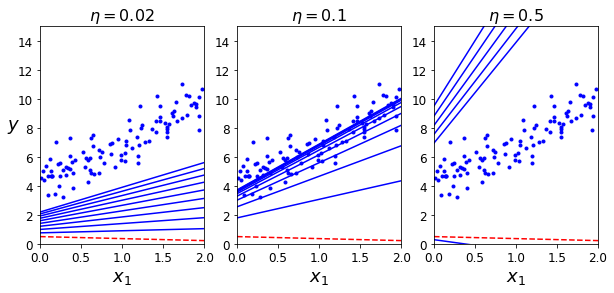

In [17]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

#왼쪽은 학습률이 너무 낮음. 시간이 오래 걸림
#가운데는 학습률이 적당함. 적은 반복으로 이미 최적점에 수렴함
#오른쪽은 학습률이 너무 높음. 최적점에서 점점 멀어져 발산함
# => 적절한 학습률을 찾기 위해서는 그리드 탐색을 이용함. 
#반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면(벡터의 어떤 노름이 허용오차보다 작아지면) 알고리즘 중지

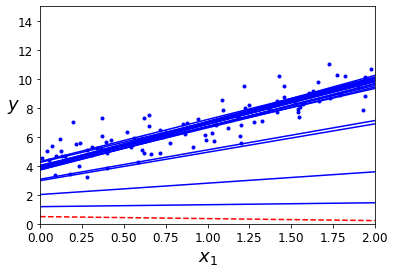

In [18]:
#2. 확률적 경사 하강법(SGD)

#배치 경사 하강법은 매 스텝 전체 훈련 세트를 사용해 그레이디언트를 계산하기 때문에 훈련 세트가 커지면 매우 느려짐
#확률적 경사 하강법은 매 스텝 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산
# -> 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 알고리즘이 훨씬 빠르고 매우 큰 훈련 세트도 훈련시킬 수 있음
#반면 비용 함수가 매우 불규칙함. (단점: 최솟값에 안착하지 못함 / 장점: 지역 최솟값에서 탈출시켜줌)
#이를 해결하려면 학습률을 점진적으로 감소시킴. 담금질 기법 알고리즘과 유사함
#매 반복에서 학습률을 결정하는 함수를 학습 스케줄이라고 부름.

#학습 스케줄을 사용한 확률적 경사 하강법의 구현

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50 #에포크(epoch): 일반적으로 한 반복에서 m번 되풀이 되는데 이때 각 반복을 에포크라고 함
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
plt.show()

#훈련 스텝의 첫 20개 출력
#배치 경사 하강법 코드가 전체 훈련 세트에 대해 1,000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했음

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
#사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본갑승로 제곱 오차 비용 함수를 최적화 하는 SGDRegressor 클래스 사용

from sklearn.linear_model import SGDRegressor

#최대 1,000번 에포크 동안 실행(max_iter = 1000) 또는 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행(tol=1e-3)
#학습률 0.1(eta0=0.1)로 기본 학습 스케줄(이전과는 다른)을 사용. 규제는 사용하지 않음(penalty=None)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

#정규방정식으로 구한 것과 매우 비슷한 값을 얻음

(array([4.24365286]), array([2.8250878]))

In [22]:
#3. 미니배치 경사 하강법

#각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하지 않고 미니배치라 부르는 임의의 작은 샘플 세트에 대해 계산
#확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해 얻는 성능 향상이다

#미니배치를 어느정도 크게 하면 SGD보다 덜 불규칙적으로 움직임 -> 미니배치가 SGD보다 실제 최솟값에 더 가까운 값을 구함
#But. 지역 최솟값에서 빠져나오기는 더 힘듦.

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [24]:
#세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

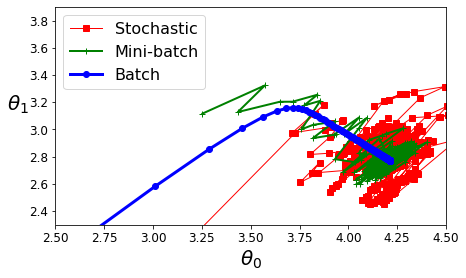

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

#모두 최솟값 근처에 도달했음
#배치 경사 하강법: 실제로 최솟값에서 멈춤. But. 매 스텝에서 많은 시간이 소요됨
#확률적 경사 하강법, 미니배치 경사 하강법: 근처에서 맴돌고 있음. But. 적절한 학습 스케줄을 사용하면 최솟값에 도달함

In [26]:
#다항 회귀

#가지고 있는 데이터가 단순한 직선보다 복잡한 형태인 경우 ⓐ 각 특성의 거듭 제곱을 새로운 특성으로 추가하고
#ⓑ 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련 시킴
# -> 다항 회귀


#2차 방정식으로 비선형 데이터 생성

import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

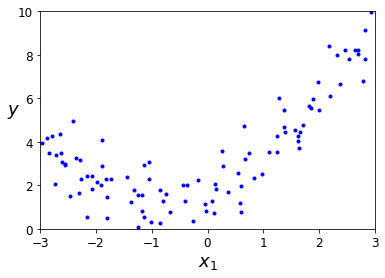

In [27]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [28]:
#사이킷런의 PolynomialFeatures 를 사용해 훈련 데이터 변환하기
# -> 훈련 세트에 잇는 각 특성을 제곱하여 새로운 특성으로 추가

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0] #원래 훈련 세트

array([-0.75275929])

In [29]:
X_poly[0] #각 특성을 제곱한 새로운 특성이 추가된 훈련 세트

array([-0.75275929,  0.56664654])

In [30]:
#확장된 훈련 데이터에 LinearRegression 적용하기

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

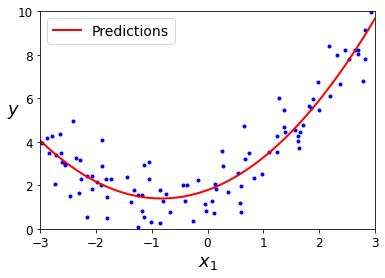

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

#특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음(일반적인 선형 회귀 모델에서는 불가능)
# -> PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문

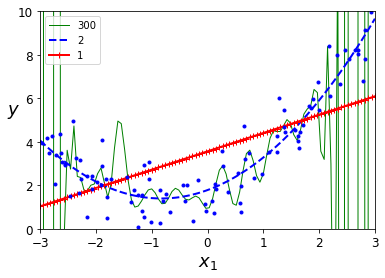

In [32]:
#학습 곡선

#고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것임

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

#단순 선형 혹은 2차 모델에 비해 300차 다항 회귀 모델은 훈련 샘플에 가능한 한 가까이 가려고 구불구불하게 나타남
# -> 과대적합. 과대/과소적합인지 확인하기 위해서는 ⓐ교차 검증, ⓑ학습 곡선을 살펴보면 됨
#교차검증: 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘면 과대적합. 양쪽 모두 좋지 않으면 과소적합.
#학습 곡선에 대해서는 다음 코드에서 설명

In [33]:
#단순 선형 회귀 모델의 학습 곡선

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

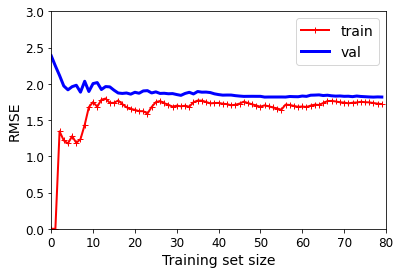

In [34]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
plt.show()                                      # 책에는 없음

#훈련 데이터의 성능: 적은 샘플이 있을 땐 모델이 완벽하게 작동하지만 곡선이 평편해질 때까지 오차 상승. 이후 평균 오차의 변화X.
#검증 데이터의 성능: 초기에 매우 크지만 천천히 감소. But. 오차의 감소가 완만해져 훈련 세트의 그래프와 가까워짐
# -> 과소적합 모델의 전형적인 모습. 두 곡선이 수평한 구간을만들고 꽤 높은 오차에서 매우 가까이 근접해있음
# 해결방법: ⓐ 더 복잡한 모델 사용. ⓑ 더 나은 특성 선택.

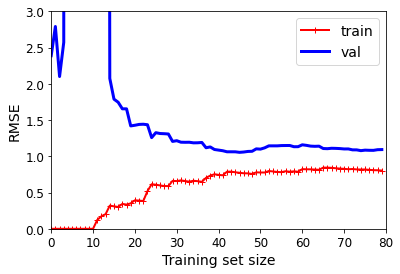

In [35]:
#같은 데이터에서 10차 다항 회귀 모델의 학습 곡선

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
plt.show()                        # 책에는 없음

#이전과 비슷해 보이지만 두 가지 매우 중요한 차이점이 있음
#1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
#2. 두 곡선 사이에 공간이 있음. 즉, 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 나음을 의미
# -> 과대적합 모델의 특성. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐
#해결방법: 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터 추가

#편향: 잘못된 가정. 편향이 크면 훈련 데이터에 과소적합되기 쉬움
#분산: 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감. 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합됨
#줄일 수 없는 오차: 데이터 자체에 있는 잡음. 데이터에서 잡음을 제거하는 것으로 오차를 줄임(이상치 감지해 제거)
# -> 모델의 복잡도가 커지면 분산이 증가하고 편향이 감소함. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아짐.(트레이드오프)

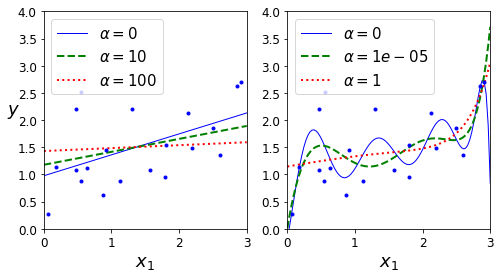

In [36]:
#규제가 있는 선형 모델

#1. 릿지 회귀
#규제가 추가된 선형 회귀 버전.(규제항이 비용 함수에 추가됨/l2 노름의 제곱을 2로 나눈 것) 
#모델의 가중치가 가능한 한 작게 유지되도록 노력함
#모델의 훈련이 끝나면 모델의 성능은 규제가 없는 성능 지표로 평가함
#하이퍼파라미터 α는 모델을 얼마나 많이 규제할지 조절함
#α=0이면 선형 회귀와 같아짐. 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨

#몇 가지 다른 하이퍼파라미터를 사용해 훈련시킨 코드

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

#왼쪽: 평범한 릿지 모델을 사용해 선형적인 예측을 만듦
#오른쪽: PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지모델 적용
#왼쪽은 선형 회귀, 오른쪽은 다항 회귀 모델
#하이퍼파라미터를 증가시킬수록 직선에 가까워짐. 즉, 모델의 분산은 줄지만 편향은 커지게 됨

In [37]:
#릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있음.
#장단점은 이전과 같음

#정규방정식을 사용한 릿지 회귀를 적용하는 코드 

from sklearn.linear_model import Ridge

redge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) #안드레 루이 솔레스키가 발견한 행렬 분해 사용
redge_reg.fit(X, y)
redge_reg.predict([[1.5]])

array([[1.55071465]])

In [38]:
#확률적 경사 하강법을 사용한 릿지 회귀를 적용하는 코드

#penalty 는 사용할 규제를 지정. 즉, 릿지 회귀와 같음
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

#대안으로 사용할 수 있는 코드
# ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
# ridge_reg.fit(X, y)
# ridge_reg.predict([[1.5]])

array([1.47012588])

C:\Users\rlatp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


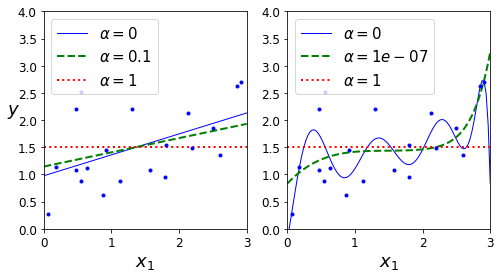

In [39]:
#라쏘 회귀
#선형 회귀의 또 다른 규제된 버전
#릿지 회귀처럼 비용 함수에 규제항을 더하지만 l2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1 노름을 사용함

#몇 가지 다른 하이퍼파라미터를 사용해 훈련 (릿지 모델에서 했던 것과 비슷하지만 라쏘 모델을 사용하고 더 작은 값을 사용함)

from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

#라쏘 회귀의 중요한 특징: 덜 중요한 특성의 가중치를 제거하려 함(즉, 가중치 = 0)
#자동으로 특성 선택을 하고 희소 모델을 만듦(즉, 0이 아닌 특성의 가중치가 적음)


In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [41]:
#엘라스틱넷
#릿지와 라쏘 회귀를 절충한 모델
#규제항: 릿지와 회귀의 규제항을 단순히 더해서 사용. 혼합 정도는 혼합 비율 r을 사용해 조절
#r=0이면 릿지회귀와 같고, r=1이면 라쏘 회귀와 같다

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

#릿지를 기본으로 사용하지만 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.
#특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 라쏘보다 엘라스틱넷을 선호한다.

array([1.54333232])

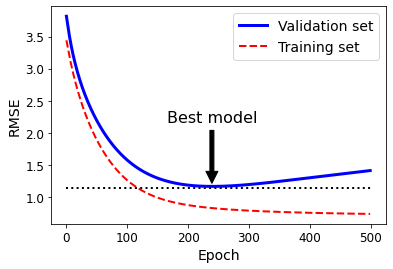

In [42]:
#조기 종료
#검증 에러가 최솟값에 도달하면 바로 훈련을 중지시킨다.
#이 규제 테크닉은 매우 효과적이고 간단하다

#배치 경사 하강법으로 훈련시킨 고차원 다항 회귀 모델로 알아보는 조기 종료의 필요성
#조기 종료의 기본적인 구현 코드
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
        
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

#감소하던 검증 에러가 멈추었다가 다시 상승하는 양상을 보임
#모델이 훈련 데이터에 과대적합되기 시작함
#이때 조기 종료가 필요함

#확률적 경사 하강법이나 미니배치 경사 하강법에서는 곡선이 매끄럽지 않아 최솟값에 도달했는지 확인하기 어렵다
# -> 일정 시간 동안 검증 에러가 최솟값보다 클 때 학습을 멈추고 검증 에러가 최소였을 때의 파라미터로 되돌린다

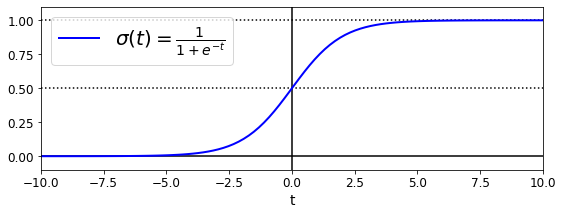

In [43]:
#로지스틱 회귀
#샘플이 특정 클래스에 속할 확률을 추정
#Ex: 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측(양성클래스/레이블이 '1')
#Ex: 그렇지 않으면 클래스에 속하지 않는다고 예측(음성클래스/레이블이 '0')
# -> 이진 분류기


#확률 추정
#로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산하고 편향을 더한다
#대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력한다
#로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수이다(즉, S자 형태임)

#로지스틱 함수
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

#theta.T.dot(X)를 t라고 할 때, t<0 이면 σ(t) < 0.5, t>=0 이면 σ(t) >= 0.5이다
# -> theta.T.dot(X)가 양수일 때 1(양성클래스)이라고 예측하고, 음수일 때 0(음성클래스)이라고 예측함

In [ ]:
#훈련과 비용함수

#훈련
#훈련의 목적은 양성샘플(y=1)에 대해서는 높은 확률을 추정하고 음성샘플(y=0)에 대해서는 낮은 확률을 추정하는
#모델의 파라미터 벡터 theta를 찾는 것이다

#비용함수 c(theta) = (y가 1일 때) -log(p(샘플 x가 양성 클래스에 속할 확률)) / (y가 0일 때) -log(1-p)
#훈련의 목적이 비용 함수에 드러나있다
#t가 0에 가까워지면 -log(t)가 매우 커지므로 타당하다
#모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가하고 음성 샘플을 1에 가까운 확률로 추정해도 비용이 증가

#전체 훈련 세트에 대한 비용함수는 모든 훈련 샘플의 비용을 평균한 것이고 이를 로그 손실이라 부름
#이 비용 함수의 최솟값을 계산하는 알려진 해가 없음(정규방정식 같은 것이 없음)
#하지만 볼록함수이므로 경사 하강법이 전역 최솟값을 찾는 것을 보장함
#How to? -> 이 비용 함수의 j번째 모델 파라미터 theta(j)에 대해 편미분을 하면 배치 경사 하강법에서의 것과 비슷해진다
#모든 편도함수를 포함한 그레이디언트 벡터를 만들면 배치 경사 하강법 알고리즘을 사용할 수 있다

In [47]:
#결정 경계

#붓꽃 데이터셋을 사용한 로지스틱 회귀 예제
#꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기 만들기

#데이터 로드
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [48]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
X = iris["data"][:, 3:] #꽃잎의 너비
y = (iris["target"] == 2).astype(int) #1 Iris-Virginica면 1, 그렇지 않으면 0

In [50]:
#버전이 바뀌더라도 동일한 결과를 만들기 위해 solver = "lbfgs"로 지정

#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

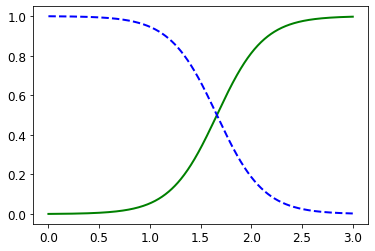

In [51]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산하기

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

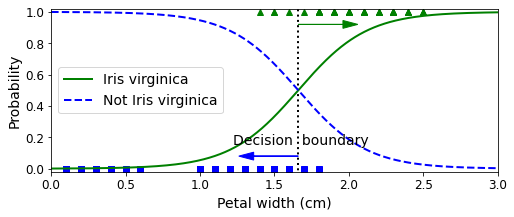

In [52]:
#조금 더 깔끔한 plot을 위한 코드

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

#Iris-Virginica(삼각형)의 꽃잎 너비는 1.4~2.5cm에 분포
#다른 붓꽃(사각형)은 일반적으로 꽃잎 너비가 더 작아 0.1~1.8cm에 분포
# -> 중첨되는 부분 존재

#꽃잎의 너비가 2cm 이상인 꽃은 분류기가 Virginica 라고 확신하고 1cm아래면 Virginica가 아니라고 확신함
#두 극단 사이의 분류가 확실하진 않지만 클래스를 예측하려 하면 가장 가능성 높은 클래스를 반환함
# -> 양쪽의 확률이 똑같이 50%가 되는 1.6cm근방에서 "결정 경계"가 만들어짐
#꽃잎 너비가 1.6cm보다 크면 분류기는 Virginica로 분류하고, 그 보다 작으면 아니라고 예측할 것임(확실하지 않더라도)

In [53]:
decision_boundary #결정 경계

array([1.66066066])

In [54]:
log_reg.predict([[1.7], [1.5]]) #꽃잎의 너비가 1.7cm인 것과 1.5cm인 것의 종류 예측하기

array([1, 0])

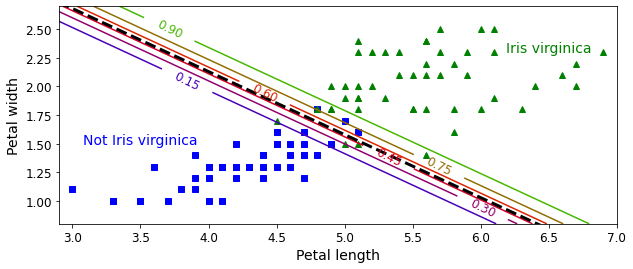

In [55]:
#소프트맥스 회귀(확률 추정, 예측 생성)

#로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화 될 수 있음
# -> 소프트맥스 회귀 또는 다항 로지스틱 회귀라 함

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42) #파라미터 C가 규제의 정도 조절 (C가 높을수록 규제 줄어듦)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

#점선은 50%확률을 추정하는 지점(결정 경계, 선형임)
#15%부터 90%까지 수평한 직선들은 모델이 특정 확률을 출력하는 포인트를 나타냄
#맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 90% 이상의 확률로 Virginica라고 판단할 것

In [ ]:
#샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 S(x)를 계산하고
#그 점수에 소프트맥스 함수(또는 정규화된 지수함수)를 적용해 각 클래스의 확률을 추정함
#클래스 k에 대한 소프트맥스 점수 S(x) = theta(클래스 k에 대한).T.dot(x)

#각 클래스에 대한 파라미터 벡터(theta)들은 파라미터 행렬에 행으로 저장됨

#이 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 p를 추정할 수 있음
#소프트맥스 함수: 각 점수에 지수 함수를 적용한 후 정규화(모든 지수 함수 결과의 합으로 나눔) -> 로짓 또는 로그-오즈라고 함

#소프트맥스 회귀 분류기는 추정 확률이 가장 높은(점수가 가장 높은) 클래스를 선택함
#한 번에 하나의 클래스만 예측. -> 상호 배타적인 클래스에서만 사용해야함 (하나의 사진에서 여러 사람의 얼굴 인식하는데 사용 X)

In [57]:
#훈련 방법
#모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 목적

#크로스 엔트로피 비용 함수
#추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용
#만약 추정이 완벽하다면 원래 엔트로피와 동일하지만 가정이 틀렸다면 쿨백-라이블러 발산이라 불리는 양만큼 커질 것임

#소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류하기
#LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용함
#But. multi_class매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀를 사용할 수 있음


#소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야함
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42) #C를 사용하여 규제 조절
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [60]:
#꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃의 품종 예측
softmax_reg.predict([[5, 2]])

array([2])

In [61]:
#94.2%의 확률로 Virginica 또는 5.8% 확률로 Versicolor라고 예측
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

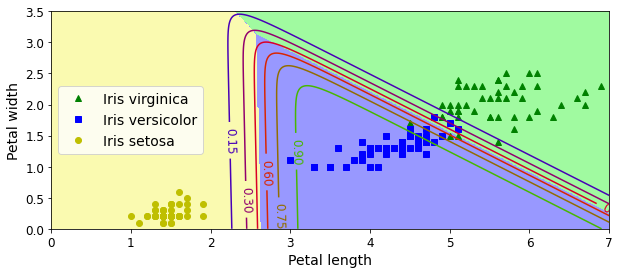

In [63]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

#결정 경계를 배경색으로 구분하여 나타냄
#클래스 사이의 결정 경계가 모두 선형임
#Versicolor 클래스에 대한 확률을 곡선으로 나타냄
#이 모델은 추정확률 50%이하인 클래스를 예측할 수도 있음(Ex: 모든 결정 경계가 만나는 지점에서는 모든 클래스가 33%의 확률을 가짐)